# normal equation 

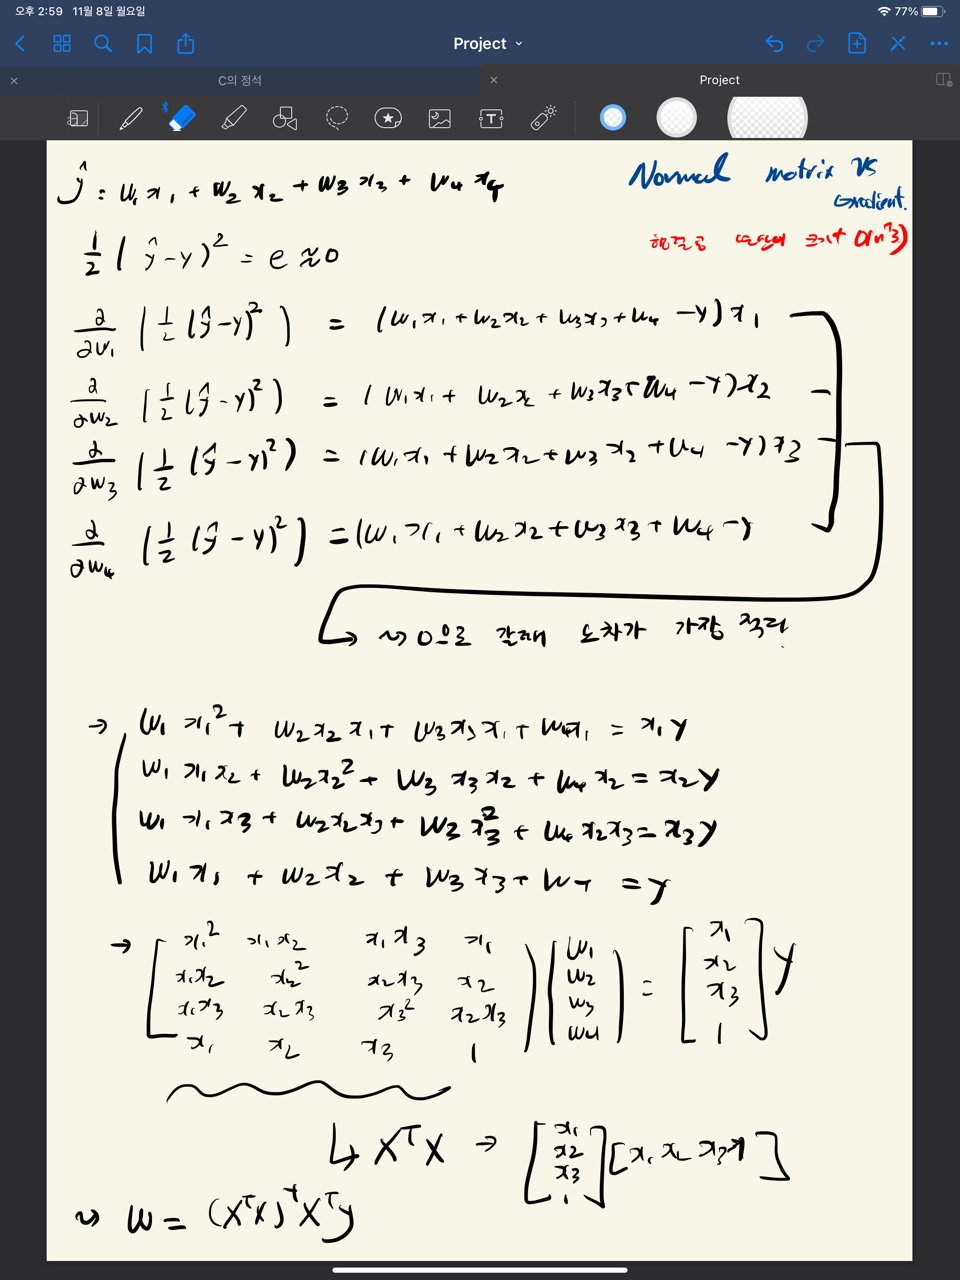

In [35]:
from IPython.display import Image 
Image('./img/normalEquationProf.jpeg')

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [17]:
iris = pd.read_csv('./data/iris_train.csv')

In [18]:
iris = iris.drop('id',1 )

In [19]:
y_petal = iris['petal width (cm)']

In [20]:
y_sepal = iris['sepal width (cm)']

In [21]:
iris = iris.drop(['petal width (cm)', 'sepal width (cm)'], 1)

In [22]:
# labeling 
labeler = LabelEncoder()
iris['species'] = labeler.fit_transform(iris['species'])

# 예측식 

$ \hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + w_4$

# 목적식

$\hat{y} - y = e$: 0에 최대한 가까운값

$\frac{1}{2}(\hat{y} - {y})^2$ = e : 이 최대한 0에 가깝게 하는것 

- 오차 수식에 제곱하는이유 
- 목적식의 convexity(볼록한 정도) 유지하고 극값이 최소점인것을 보장하기 위함
- 미분하여 0인 점이 최소점이라는 것도 보장됨으로

In [26]:
X = np.array(iris) 

In [31]:
ones = np.ones_like(X[:,0])
ones = ones.reshape(75, -1) 

In [27]:
ones = np.ones_like(X[:,0]) # 1로만 되어있는 (75, ) 벡터 생성
ones = ones.reshape(75, -1) # 2차원으로 변환 (75, 1)
X = np.concatenate((X,ones), axis=1) # 기존 X와 concat 기존 X의 shape = (75, 3) -> 변환 뒤 X의 shape (75, 4)

X[:10]

array([[0. , 4.4, 1.4, 1. ],
       [1. , 6.4, 4.5, 1. ],
       [2. , 6.2, 4.8, 1. ],
       [2. , 7.2, 6.1, 1. ],
       [0. , 4.9, 1.4, 1. ],
       [2. , 6.5, 5.8, 1. ],
       [0. , 4.3, 1.1, 1. ],
       [1. , 6.7, 5. , 1. ],
       [1. , 6.8, 4.8, 1. ],
       [1. , 6.6, 4.4, 1. ]])

In [33]:
transpose_doted_X = X.T.dot(X) # X의 전치행렬 X.T 와 X 행렬곱
inversed = np.linalg.inv(transpose_doted_X) # X.T dot X 의 역행렬 계산
doted_inv_t = inversed.dot(X.T) # 역행렬과 전치행렬 행렬곱
weight_petal = doted_inv_t.dot(y_petal) # 맞춰야하는 꽃잎 너비와 행렬곱 -> weight계산
weight_petal

array([ 0.29159172, -0.10650362,  0.33433041,  0.25399605])

In [34]:
prediction_petal = X.dot(weight_petal)
error_petal = sum(abs(prediction_petal - y_petal)) / len(prediction_petal)
error_petal

0.1339297513826664